#📌 Extracción

In [1]:
import requests
import pandas as pd

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
response = requests.get(url)
data = response.json()

df_0 = pd.DataFrame(data)
df_0.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


## Normalización

In [2]:
df_norm = pd.json_normalize(data)
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [3]:
df_norm.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


**Diccionario de datos**
0. **customerID:** número de identificación único de cada cliente
1. **Churn:** si el cliente dejó o no la empresa
2. **gender:** género (masculino y femenino)
3. **SeniorCitizen:** información sobre si un cliente tiene o no una edad igual o mayor a 65 años
4. **Partner:** si el cliente tiene o no una pareja
5. **Dependents:** si el cliente tiene o no dependientes
6. **tenure:** meses de contrato del cliente
7. **PhoneService:** suscripción al servicio telefónico
8. **MultipleLines:** suscripción a más de una línea telefónica
9. **InternetService:** suscripción a un proveedor de internet
10. **OnlineSecurity:** suscripción adicional de seguridad en línea
11. **OnlineBackup:** suscripción adicional de respaldo en línea
12. **DeviceProtection:** suscripción adicional de protección del dispositivo
13. **TechSupport:** suscripción adicional de soporte técnico, menor tiempo de espera
14. **StreamingTV:** suscripción de televisión por cable
15. **StreamingMovies:** suscripción de streaming de películas
16. **Contract:** tipo de contrato
17. **PaperlessBilling:** si el cliente prefiere recibir la factura en línea
18. **PaymentMethod:** forma de pago
19. **Charges.Monthly:** total de todos los servicios del cliente por mes
20. **Charges.Total:** total gastado por el cliente





#🔧 Transformación

## Verificación de Valores Únicos

In [4]:
for col in df_norm.columns:
    print(f"Valores únicos en la columna '{col}': {df_norm[col].nunique()}")
    if df_norm[col].nunique() < 50:   #Imprime los valores solamente si no hay muchos
        print(df_norm[col].unique())
        print('-' * 50) # Línea divisoria para mejor visualización

Valores únicos en la columna 'customerID': 7267
Valores únicos en la columna 'Churn': 3
['No' 'Yes' '']
--------------------------------------------------
Valores únicos en la columna 'customer.gender': 2
['Female' 'Male']
--------------------------------------------------
Valores únicos en la columna 'customer.SeniorCitizen': 2
[0 1]
--------------------------------------------------
Valores únicos en la columna 'customer.Partner': 2
['Yes' 'No']
--------------------------------------------------
Valores únicos en la columna 'customer.Dependents': 2
['Yes' 'No']
--------------------------------------------------
Valores únicos en la columna 'customer.tenure': 73
Valores únicos en la columna 'phone.PhoneService': 2
['Yes' 'No']
--------------------------------------------------
Valores únicos en la columna 'phone.MultipleLines': 3
['No' 'Yes' 'No phone service']
--------------------------------------------------
Valores únicos en la columna 'internet.InternetService': 3
['DSL' 'Fiber o

## Verificar valores Duplicados


In [5]:
duplicados =df_norm.duplicated().sum()
print(f"Número de valores duplicados {duplicados.sum()}")

Número de valores duplicados 0


## Verificar Datos Nulos

In [6]:
nulos = df_norm.isnull().values.sum()  # Tipo NA
print(f"Número de valores nulos {nulos.sum()}")

Número de valores nulos 0


In [7]:
valores_en_blanco_o_vacios = df_norm.apply(lambda x: x.astype(str).str.strip() == '').sum() #Valores vacíos
print("Valores en blanco o string vacíos por columna:")
print(valores_en_blanco_o_vacios[valores_en_blanco_o_vacios > 0])

Valores en blanco o string vacíos por columna:
Churn                    224
account.Charges.Total     11
dtype: int64


## Manejo de Valores en blanco

In [8]:
df_norm.replace('', pd.NA, inplace=True)

In [9]:
df_norm.dropna(inplace=True)

## Cambios tipos de Datos

In [10]:
cat_col_positions = [1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18]

for pos in cat_col_positions:
    col_name = df_norm.columns[pos]
    df_norm[col_name] = df_norm[col_name].astype('category')

In [11]:
df_norm[df_norm.columns[20]] = pd.to_numeric(df_norm.iloc[:, 20], errors='coerce')

In [12]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   customerID                 7043 non-null   object  
 1   Churn                      7043 non-null   category
 2   customer.gender            7043 non-null   category
 3   customer.SeniorCitizen     7043 non-null   category
 4   customer.Partner           7043 non-null   category
 5   customer.Dependents        7043 non-null   category
 6   customer.tenure            7043 non-null   int64   
 7   phone.PhoneService         7043 non-null   category
 8   phone.MultipleLines        7043 non-null   category
 9   internet.InternetService   7043 non-null   category
 10  internet.OnlineSecurity    7043 non-null   category
 11  internet.OnlineBackup      7043 non-null   category
 12  internet.DeviceProtection  7043 non-null   category
 13  internet.TechSupport       7043 non-nu

## Valores Atípicos

In [13]:
numerical_cols = df_norm.select_dtypes(include=['int64', 'float64']).columns

# Calcular IQR para cada columna numérica
Q1 = df_norm[numerical_cols].quantile(0.25)
Q3 = df_norm[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Definir márgenes de outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Encontrar outliers
outliers = ((df_norm[numerical_cols] < lower_bound) | (df_norm[numerical_cols] > upper_bound)).any(axis=1)
print(f"Number of outliers detected: {outliers.sum()}")

Number of outliers detected: 0


#📊 Carga y análisis

In [14]:
df_norm.describe()

,customer.tenure,account.Charges.Monthly,account.Charges.Total
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


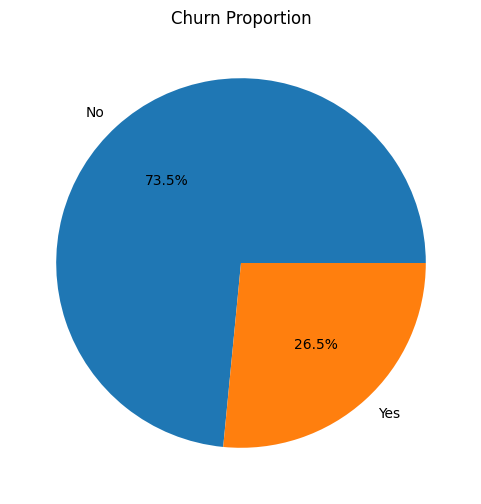

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
df_norm['Churn'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Churn Proportion')
plt.ylabel('')
plt.show()

### Variables Categóricas

In [16]:
# Lista de variables categóricas (excluyendo 'Churn')
cat_vars = [col for col in df_norm.columns if df_norm[col].dtype.name == 'category' and col != 'Churn']

for var in cat_vars:
    print(f"\n=== Tasas de Churn por {var.replace('.', ' ')} ===")
    print("(Proporciones dentro de cada Categoría)")

    # Calcular proporciones
    churn_rates = df_norm.groupby(var)['Churn'].value_counts(normalize=True).unstack()

    # Formateo de salida
    churn_rates_display = churn_rates.copy()
    churn_rates_display['Yes'] = churn_rates_display['Yes'].apply(lambda x: f"{x*100:.1f}%")
    churn_rates_display['No'] = churn_rates_display['No'].apply(lambda x: f"{x*100:.1f}%")

    print(churn_rates_display)

    # Imprimir Cantidad de Observaciones
    print("\nCantidad de Observaciones:")
    print(df_norm[var].value_counts().to_string())
    print("\n" + "="*50)


=== Tasas de Churn por customer gender ===
(Proporciones dentro de cada Categoría)
Churn               No    Yes
customer.gender              
Female           73.1%  26.9%
Male             73.8%  26.2%

Cantidad de Observaciones:
customer.gender
Male      3555
Female    3488


=== Tasas de Churn por customer SeniorCitizen ===
(Proporciones dentro de cada Categoría)
Churn                      No    Yes
customer.SeniorCitizen              
0                       76.4%  23.6%
1                       58.3%  41.7%

Cantidad de Observaciones:
customer.SeniorCitizen
0    5901
1    1142


=== Tasas de Churn por customer Partner ===
(Proporciones dentro de cada Categoría)
Churn                No    Yes
customer.Partner              
No                67.0%  33.0%
Yes               80.3%  19.7%

Cantidad de Observaciones:
customer.Partner
No     3641
Yes    3402


=== Tasas de Churn por customer Dependents ===
(Proporciones dentro de cada Categoría)
Churn                   No    Yes
customer.

<ipython-input-16-2659729963>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rates = df_norm.groupby(var)['Churn'].value_counts(normalize=True).unstack()
<ipython-input-16-2659729963>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rates = df_norm.groupby(var)['Churn'].value_counts(normalize=True).unstack()
<ipython-input-16-2659729963>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rates = df_norm

phone.MultipleLines
No                  3390
Yes                 2971
No phone service     682


=== Tasas de Churn por internet InternetService ===
(Proporciones dentro de cada Categoría)
Churn                        No    Yes
internet.InternetService              
DSL                       81.0%  19.0%
Fiber optic               58.1%  41.9%
No                        92.6%   7.4%

Cantidad de Observaciones:
internet.InternetService
Fiber optic    3096
DSL            2421
No             1526


=== Tasas de Churn por internet OnlineSecurity ===
(Proporciones dentro de cada Categoría)
Churn                       No    Yes
internet.OnlineSecurity              
No                       58.2%  41.8%
No internet service      92.6%   7.4%
Yes                      85.4%  14.6%

Cantidad de Observaciones:
internet.OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526


=== Tasas de Churn por internet OnlineBackup ===
(Proporciones dentro de cada Cate

<ipython-input-16-2659729963>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rates = df_norm.groupby(var)['Churn'].value_counts(normalize=True).unstack()
<ipython-input-16-2659729963>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rates = df_norm.groupby(var)['Churn'].value_counts(normalize=True).unstack()
<ipython-input-16-2659729963>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rates = df_norm

Churn                No    Yes
account.Contract              
Month-to-month    57.3%  42.7%
One year          88.7%  11.3%
Two year          97.2%   2.8%

Cantidad de Observaciones:
account.Contract
Month-to-month    3875
Two year          1695
One year          1473


=== Tasas de Churn por account PaperlessBilling ===
(Proporciones dentro de cada Categoría)
Churn                        No    Yes
account.PaperlessBilling              
No                        83.7%  16.3%
Yes                       66.4%  33.6%

Cantidad de Observaciones:
account.PaperlessBilling
Yes    4171
No     2872


=== Tasas de Churn por account PaymentMethod ===
(Proporciones dentro de cada Categoría)
Churn                         No    Yes
account.PaymentMethod                  
Bank transfer (automatic)  83.3%  16.7%
Credit card (automatic)    84.8%  15.2%
Electronic check           54.7%  45.3%
Mailed check               80.9%  19.1%

Cantidad de Observaciones:
account.PaymentMethod
Electronic check       

<ipython-input-16-2659729963>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rates = df_norm.groupby(var)['Churn'].value_counts(normalize=True).unstack()
<ipython-input-16-2659729963>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rates = df_norm.groupby(var)['Churn'].value_counts(normalize=True).unstack()


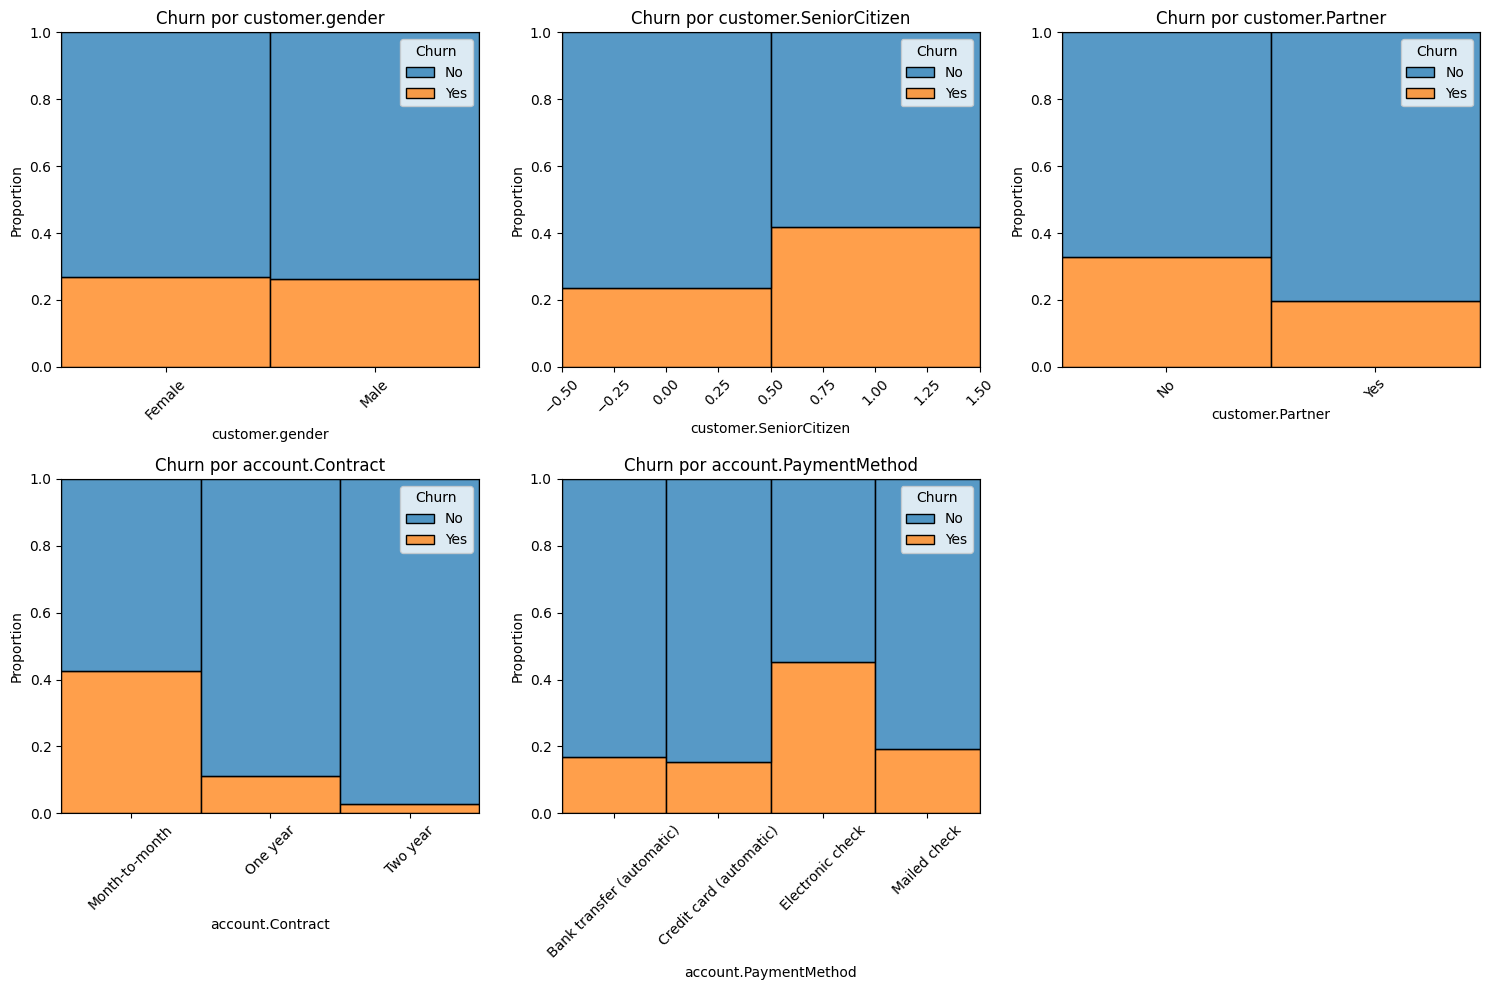

In [17]:
import seaborn as sns
cat_vars = ['customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'account.Contract', 'account.PaymentMethod']

plt.figure(figsize=(15,10))
for i, var in enumerate(cat_vars, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=df_norm, x=var, hue='Churn', multiple='fill', stat='proportion')
    plt.title(f'Churn por {var}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
from scipy.stats import chi2_contingency

# Signifcancia estadística
print("\nSignificancia estadística (Chi-cuadrado):")
for var in cat_vars:
    crosstab = pd.crosstab(df_norm['Churn'], df_norm[var])
    chi2, p, _, _ = chi2_contingency(crosstab)
    print(f"{var.ljust(15)}: p-value = {p:.4f} {'*' if p < 0.05 else ''}")


Significancia estadística (Chi-cuadrado):
customer.gender: p-value = 0.4866 
customer.SeniorCitizen: p-value = 0.0000 *
customer.Partner: p-value = 0.0000 *
account.Contract: p-value = 0.0000 *
account.PaymentMethod: p-value = 0.0000 *


### Variables Numéricas

<ipython-input-19-725645001>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_norm, x='Churn', y=var, palette={'No':'#1f77b4', 'Yes':'#ff7f0e'})
<ipython-input-19-725645001>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_norm, x='Churn', y=var, palette={'No':'#1f77b4', 'Yes':'#ff7f0e'})
<ipython-input-19-725645001>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_norm, x='Churn', y=var, palette={'No':'#1f77b4', 'Yes':'#ff7f0e'})


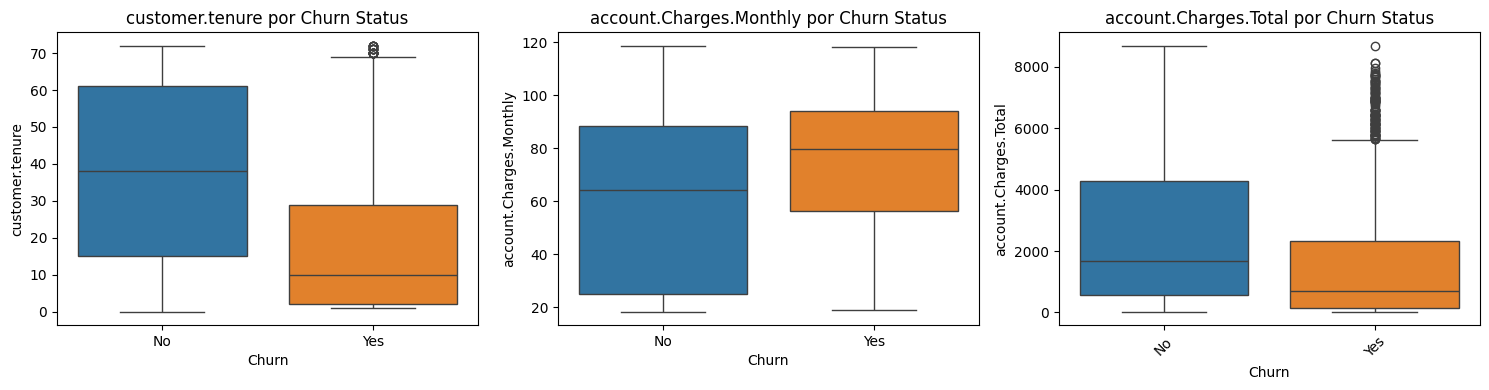

In [19]:
num_vars = ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']
plt.figure(figsize=(15,4))
for i, var in enumerate(num_vars, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=df_norm, x='Churn', y=var, palette={'No':'#1f77b4', 'Yes':'#ff7f0e'})
    plt.title(f'{var} por Churn Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
from scipy.stats import ttest_ind

# Test de T
print("\nDiferencias Medias (Test de T):")
for var in num_vars:
    group1 = df_norm[df_norm['Churn']=='No'][var].dropna()
    group2 = df_norm[df_norm['Churn']=='Yes'][var].dropna()
    t, p = ttest_ind(group1, group2)
    print(f"{var.ljust(15)}: p-value = {p:.4f} | No: {group1.mean():.1f} vs Yes: {group2.mean():.1f}")


Diferencias Medias (Test de T):
customer.tenure: p-value = 0.0000 | No: 37.6 vs Yes: 18.0
account.Charges.Monthly: p-value = 0.0000 | No: 61.3 vs Yes: 74.4
account.Charges.Total: p-value = 0.0000 | No: 2555.3 vs Yes: 1531.8


### Correlación

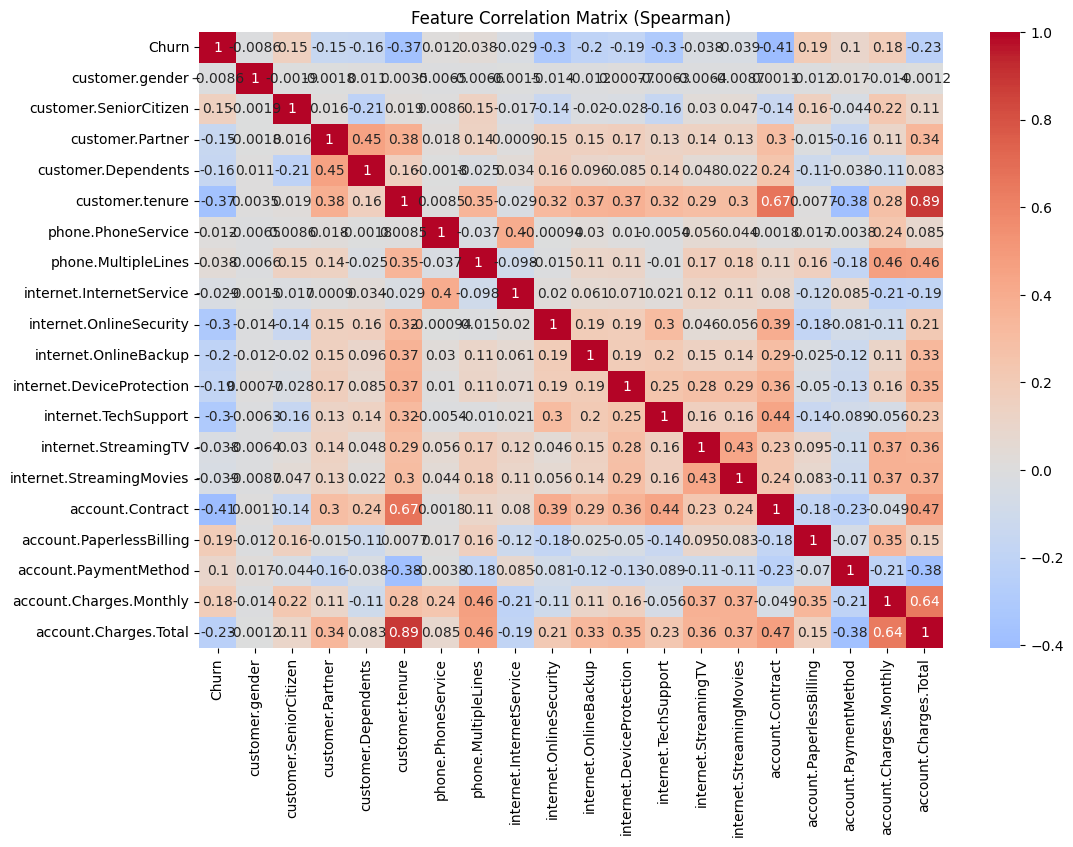

In [21]:
# Convertir varianbles categóricas en numéricas
df_corr = df_norm.copy()
for col in df_norm.select_dtypes(include='category').columns:
    df_corr[col] = df_norm[col].cat.codes

# Eliminar la columna no numérica 'customerID'
df_corr = df_corr.drop('customerID', axis=1)

plt.figure(figsize=(12,8))
sns.heatmap(df_corr.corr(method='spearman'), annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix (Spearman)')
plt.show()

#📄Informe final

La **tasa de abandono del servicio** (Churn) es de 26,5%.

Los principales factores que incrementan el riesgo de abadono son:
* **Tipo de Contrato:** los contratos mensuales tiene un riesgo mayor que los contratps anuales.

* **Método de Pago:** los usuarios de pago electrónico tiene un riesgo de abandono mayor que por otros métodos de pago.

**Recomendaciones:**
* cambiar de un contrato mensual a contratos anuales para aumentar la retención.
* promover métododos de pago automático.